In [42]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [44]:
csv_path = r"C:\Users\LENOVO\Desktop\7sem project\Indian-Traffic Sign-Dataset\traffic_sign.csv"
base_dir = r"C:\Users\LENOVO\Desktop\7sem project\Indian-Traffic Sign-Dataset\Images"

In [48]:
# Load CSV file
label_mapping = pd.read_csv(csv_path)

In [50]:
class_mapping = {row["ClassId"]: row["Name"] for _, row in label_mapping.iterrows()}

In [52]:
img_height, img_width = 64, 64  # Resize images to 64x64
batch_size = 32
epochs = 20

In [54]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2  # Reserve 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Training data
    shuffle=True
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Validation data
)

Found 11190 images belonging to 58 classes.
Found 2781 images belonging to 58 classes.


In [56]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.1773 - loss: 3.3540 - val_accuracy: 0.5703 - val_loss: 1.6894
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.5221 - loss: 1.6882 - val_accuracy: 0.6778 - val_loss: 1.1908
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.6435 - loss: 1.2007 - val_accuracy: 0.7166 - val_loss: 1.0025
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.7084 - loss: 0.9229 - val_accuracy: 0.7310 - val_loss: 0.9073
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.7443 - loss: 0.7971 - val_accuracy: 0.7594 - val_loss: 0.8481
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.7719 - loss: 0.6667 - val_accuracy: 0.7641 - val_loss: 0.8057
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.7988 - loss: 0.6031 - val_accuracy: 0.7724 - val_loss: 0.7706
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.8100 - loss: 0.5488 - val_accurac

In [68]:
model_save_path= r"C:\Users\LENOVO\Desktop\7sem project\Indian-Traffic Sign-Dataset\traffic_sign_model_new.h5"

In [70]:
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to C:\Users\LENOVO\Desktop\7sem project\Indian-Traffic Sign-Dataset\traffic_sign_model_new.h5


In [72]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8013 - loss: 0.7099
Validation Accuracy: 80.22%


In [74]:
Y_pred = model.predict(validation_generator)
y_pred = Y_pred.argmax(axis=1)
y_true = validation_generator.classes

87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


In [82]:
num_classes = len(validation_generator.class_indices)  # Get number of classes
target_names = [class_mapping[i] for i in range(num_classes)]

In [84]:
print("\nConfusion Matrix")
print(confusion_matrix(y_true, y_pred))


Confusion Matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 2 3 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 2 2 ... 2 3 4]
 [0 1 0 ... 1 2 0]]


In [86]:
print("\nClassification Report")
print(classification_report(y_true, y_pred, target_names=target_names))


Classification Report
                                 precision    recall  f1-score   support

                       Give way       0.03      0.03      0.03        40
                       No entry       0.03      0.03      0.03        40
                One-way traffic       0.03      0.03      0.03        40
                One-way traffic       0.00      0.00      0.00        40
 No vehicles in both directions       0.03      0.03      0.03        40
            No entry for cycles       0.03      0.03      0.03        40
    No entry for goods vehicles       0.00      0.00      0.00        40
       No entry for pedestrians       0.00      0.00      0.00        40
     No entry for bullock carts       0.03      0.03      0.03        40
        No entry for hand carts       0.03      0.03      0.03        40
    No entry for motor vehicles       0.06      0.05      0.05        40
                   Height limit       0.00      0.00      0.00        40
                   Weight l

In [88]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

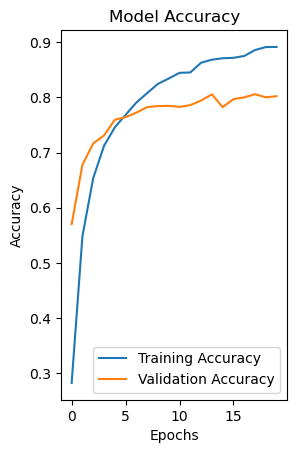

In [90]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [94]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>